In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from scipy.special import softmax

In [14]:
watson_df = pd.read_csv('../data/watson_labeled.csv')
watson_labels = ["sad-watson", "joy-watson", "fear-watson", "disgust-watson", "anger-watson"]
watson_df = watson_df[watson_labels]
watson_df = watson_df.rename(columns={"sad-watson":"sadness", "joy-watson":"joy", "fear-watson":"fear", "disgust-watson":"disgust", "anger-watson":"anger"})
watson_df.head()

,sadness,joy,fear,disgust,anger
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.104426,0.509384,0.041365,0.060137,0.139513
3,0.263580,0.087135,0.157997,0.286014,0.279036
4,0.142407,0.025171,0.728310,0.215535,0.172101


In [9]:
twitter_roberta_df = pd.read_csv('../data/twiter_roberta_volunteer_1000.csv', )
twitter_roberta_labels = ['anger', 'joy', 'optimism', 'sadness']
twitter_roberta_df = twitter_roberta_df[twitter_roberta_labels]
twitter_roberta_df.head()

,anger,joy,optimism,sadness
0,0.008924,-0.242645,0.843529,0.546363
1,1.569450,-0.123015,-0.555020,0.703006
2,1.061122,-1.039834,1.878175,-0.721822
3,0.727090,-1.144344,0.905980,0.512724
4,1.236506,-1.607382,-0.365511,1.277178


In [20]:
softmax_df = twitter_roberta_df.apply(softmax, axis=1)
softmax_df.head()

,anger,joy,optimism,sadness
0,0.172619,0.134225,0.397698,0.295458
1,0.580045,0.106766,0.069313,0.243876
2,0.281349,0.034420,0.636924,0.047307
3,0.316772,0.048752,0.378824,0.255652
4,0.434556,0.025291,0.087559,0.452595


In [34]:
from numpy.polynomial.polynomial import polyfit

def plot_correlation(label):
    x = watson_df[label].values
    y = softmax_df[label].values
    plot_line(x, y, f'watson api {label}', f'twitter roberta {label}')

def plot_line(x, y, xlabel, ylabel):
    b, m = polyfit(x, y, 1)
    plt.plot(x, y, '.')
    plt.plot(x, b + m * x, '-')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

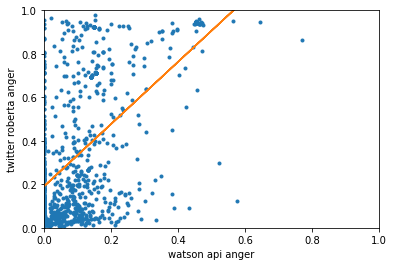

In [30]:
plot_correlation('anger')

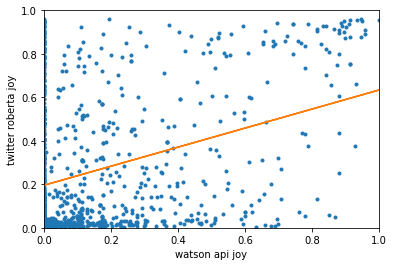

In [31]:
plot_correlation('joy')

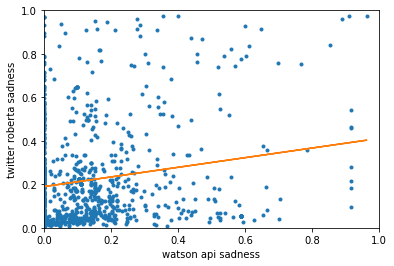

In [32]:
plot_correlation('sadness')

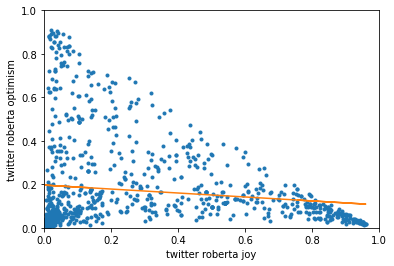

In [39]:
plot_line(softmax_df['joy'].values, softmax_df['optimism'].values, 'twitter roberta joy', 'twitter roberta optimism')

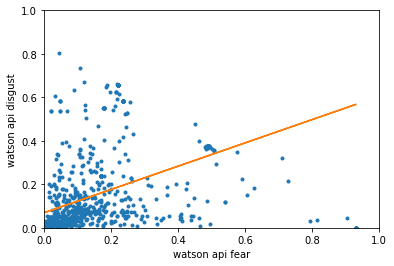

In [40]:
plot_line(watson_df['fear'].values, watson_df['disgust'].values, 'watson api fear', 'watson api disgust')